### **Priyanka Gupta**
### **IoT and Computer Vision Intern at the Sparks Foundation**
### **GRIPMAR2021**

**Task 2**: Implement an image color detector which identifies all the colors in an image or video.


In [28]:
#IMPORT LIBRARIES
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from google.colab import files

In [29]:
%matplotlib inline

In [30]:
#UPLOAD A FILE
uploaded = files.upload()

Saving colorpic.jpg to colorpic (1).jpg


The type of this input is <class 'numpy.ndarray'>
Shape: (662, 1000, 3)


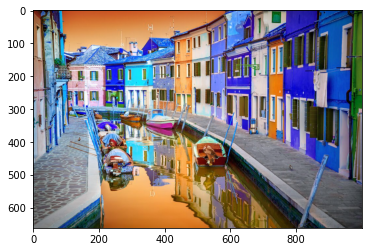

In [31]:
#VIEW YOUR IMAGE
image = cv2.imread('colorpic.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

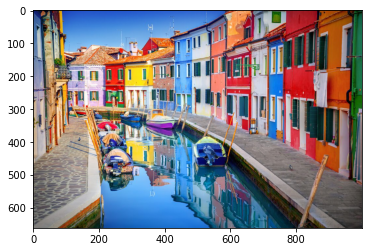

In [32]:
#CONVERTING BLUE GREEN RED IMAGE TO RED GREEN BLUE
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

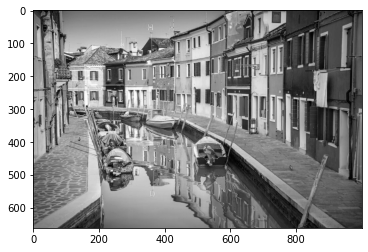

In [33]:
#CONVERTING BLUE GREEN RED IMAGE TO GRAY IMAGE
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

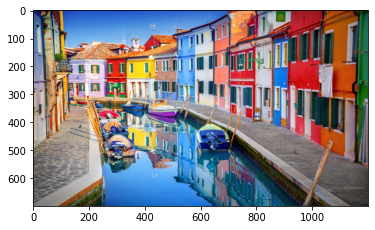

In [34]:
#RESIZING THE IMAGE
resized_image = cv2.resize(image, (1200, 700))
plt.imshow(resized_image)

In [35]:
#COLOUR IDENTIFICATION: RGB TO HEX CONVERSION
def RGB2HEX(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
  

In [36]:
def get_image(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

In [37]:
def get_colors(image, number_of_colors, show_chart):
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)
  center_colors = clf.cluster_centers_
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

  return rgb_colors

[array([25.86077804, 40.27422506, 35.9935163 ]),
 array([244.67718216, 193.54079696,  45.61669829]),
 array([86.54273251, 81.64736927, 78.80995207]),
 array([ 41.96976306, 110.01302605, 196.26771189]),
 array([217.12795297, 215.34501703, 218.99840677]),
 array([125.50042313,  39.08180536,  26.40944993]),
 array([215.51506688, 144.64912539, 104.75062472]),
 array([120.89715746, 179.36090706, 232.51533057]),
 array([ 73.15836416, 146.98262421, 223.94133192]),
 array([153.49002671, 146.46152562, 149.51890336]),
 array([24.44853594, 77.28471606, 96.34849157]),
 array([123.01173089, 113.80500311, 117.40599751]),
 array([182.08250714,  86.02982692,  25.47227357]),
 array([193.4533037 , 181.44571005, 175.48428022]),
 array([201.68169921,  31.74743306,  40.8778941 ])]

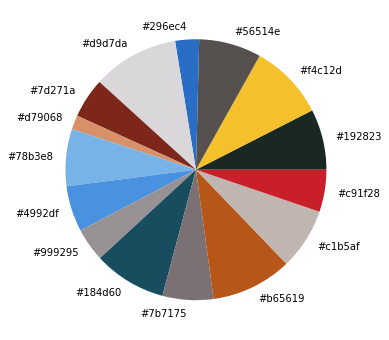

In [38]:
#TOP 15 COLOURS IN THE IMAGE
get_colors(get_image('colorpic.jpg'), 15, True)